<font size="5"><b>Elective Surgeries - Exponential Smoothing</b></font>

Data on elective surgeries was captured for one hospital over an extended time period. When plotting the time series, we see that there is a general long term trend of decreasing numbers of surgeries. There is also a seasonal effect as the number of surgeries fluctuates significantly from one month to the next, sometimes increasing despite the overall decline. The ACF graph likewise reflects the presence of a trend, and the PACF graph indicates there is seasonality, over intervals of 12 months corresponding to yearly patterns. Also the box and whiskers plot demonstrates that certain months tend to feature higher surgery numbers on a regular basis than other months (e.g. February vs August).

In order to forecast future numbers of elective surgeries for 12 months, we ran three different exponential smoothing methods from the Statsmodels package. Simple exponential smoothing predicted an outcome that resembled the last value in the series, with no change from one month to the next. Holt's method forecasted a constant trend in the number of surgeries, which involved a decline that mirrored the long term decrease in this data series. Finally, Holt-Winters' method accounted for both trends and seasonality, and predicted a continued overall decrease but also fluctuations from one month to the next that were consistent with past seasonal patterns. Given it was the most thorough and appropriate model taking into account trends and seasonality, we used the '.forecast' method on Holt-Winters to present the predicted number of surgeries for the next year.

In [22]:
import pandas as pd
import numpy as np
surgery=pd.read_csv('datasets/elective_surgeries.csv')
surgery.describe()

,number
count,84.000000
mean,329.809524
std,84.783136
min,206.000000
25%,258.750000
50%,321.500000
75%,399.250000
max,514.000000


In [23]:
surgery['month_num'] = 0

for i in range(len(surgery)):
    surgery['month_num'][i] = i + 1
    i = i + 1

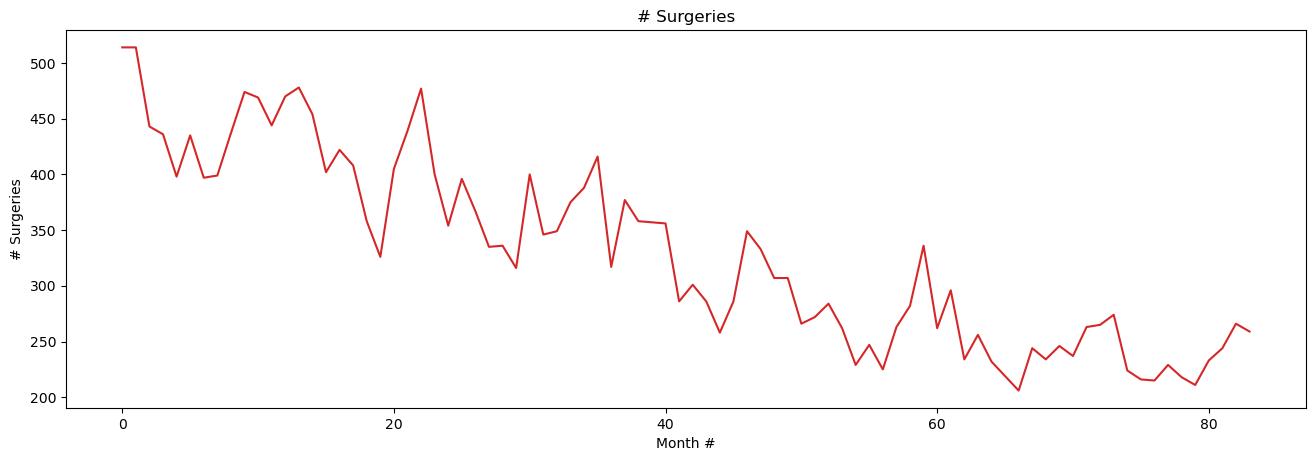

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Function to plot raw data to assess if there is any trend or seasonality
def plot_df(df, x, y, title="", xlabel='Month #', ylabel='# Surgeries', dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(surgery, x=surgery.index, y=surgery['number'], title='# Surgeries')

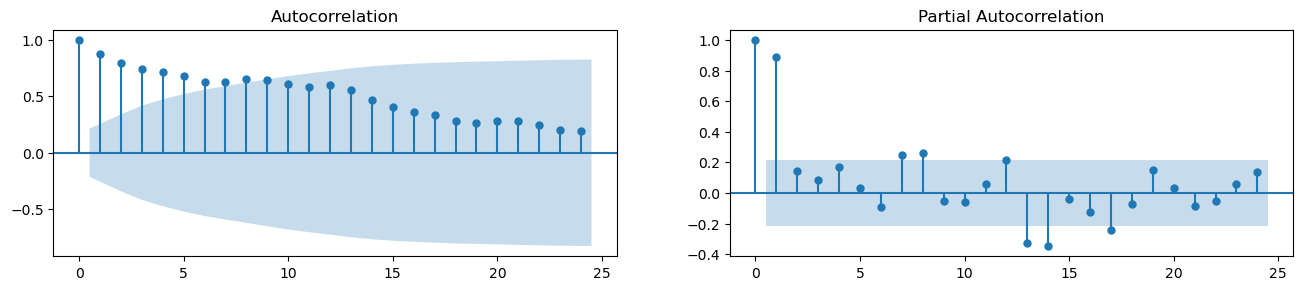

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 3), dpi=100)
plot_acf(surgery['number'], lags=24, ax=axes[0])
plot_pacf(surgery['number'], lags=24, ax=axes[1])
plt.show()

In [26]:
surgery['month_of_year'] = 0
for i in range(len(surgery)):
    surgery['month_of_year'][i] = surgery['month_num'][i] % 12
    if surgery['month_of_year'][i] == 0:
        surgery['month_of_year'][i] = 12

In [27]:
surgery['month_of_year']

0      1
1      2
2      3
3      4
4      5
      ..
79     8
80     9
81    10
82    11
83    12
Name: month_of_year, Length: 84, dtype: int64

In [28]:
surgery['month_of_year'].value_counts()

12    7
11    7
10    7
9     7
8     7
7     7
6     7
5     7
4     7
3     7
2     7
1     7
Name: month_of_year, dtype: int64

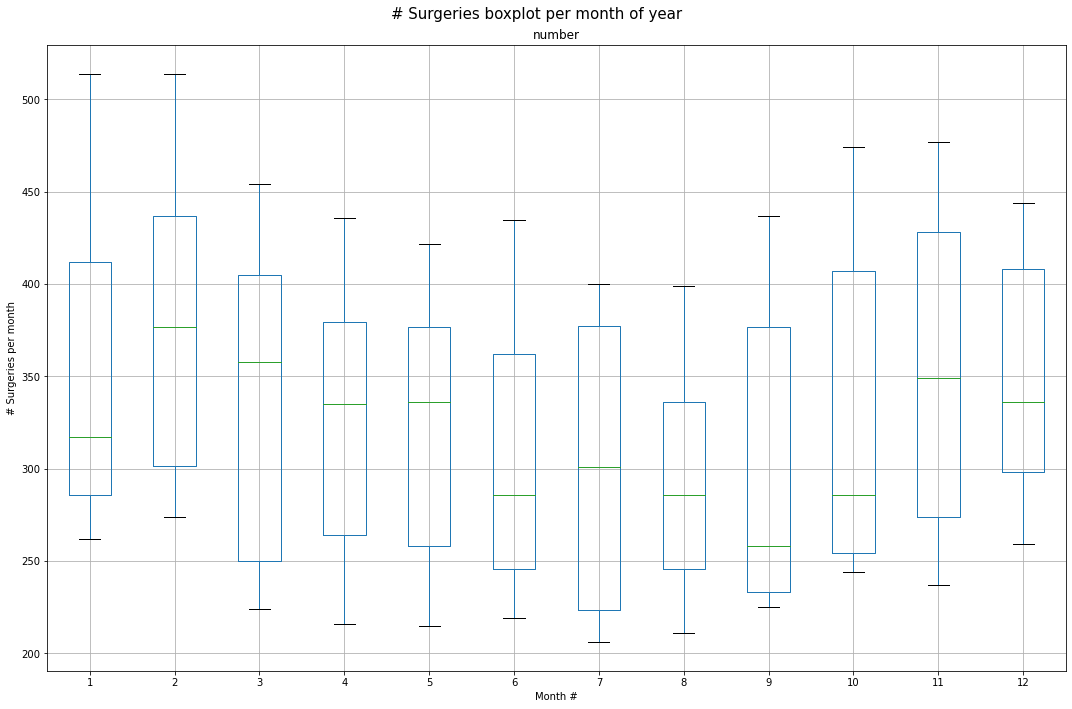

In [29]:
surgery_box = surgery.boxplot(by='month_of_year', column='number',
                           figsize=(15, 10))
surgery_box.set_xlabel('Month #')
surgery_box.set_ylabel('# Surgeries per month')
plt.suptitle('# Surgeries boxplot per month of year', fontsize=15)

plt.tight_layout()
plt.show()

c:\users\justin scott\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


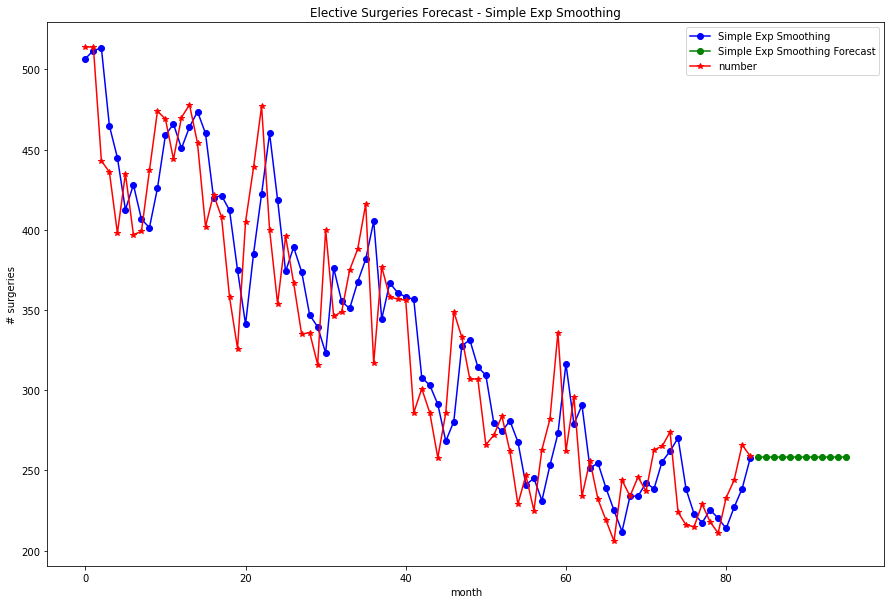

In [30]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Display comparison of Mean Absolute Error for each method, in addition to auto-selected parameter values
# Simple Exponential Smoothing - algorithm to auto-select smoothing_level parameter value
fit1 = SimpleExpSmoothing(surgery['number']).fit()
fit1.fittedvalues = fit1.fittedvalues.rename('Simple Exp Smoothing')
fcast1 = fit1.forecast(12).rename('Simple Exp Smoothing Forecast')
fit1.fittedvalues.plot(marker='o',  color='blue')
fcast1.plot(marker='o', color='green', figsize=(15,10))
surgery['number'].plot(marker='*', color='red')
plt.xlabel('month')
plt.ylabel('# surgeries')
plt.title('Elective Surgeries Forecast - Simple Exp Smoothing')
plt.legend(loc='best')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Smoothing Level Simple Exp ', fit1.params['smoothing_level'])

rmse1 = np.sqrt(mean_squared_error(fit1.fittedvalues, surgery['number']))
mae1 = mean_absolute_error(fit1.fittedvalues, surgery['number'])
print('RMSE Simple Exp Smoothing: ', rmse1)
print('MAE Simple Exp Smoothing: ', mae1)

Smoothing Level Simple Exp  0.6900853960400005
RMSE Simple Exp Smoothing:  34.30843367816348
MAE Simple Exp Smoothing:  27.17384376058728


c:\users\justin scott\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


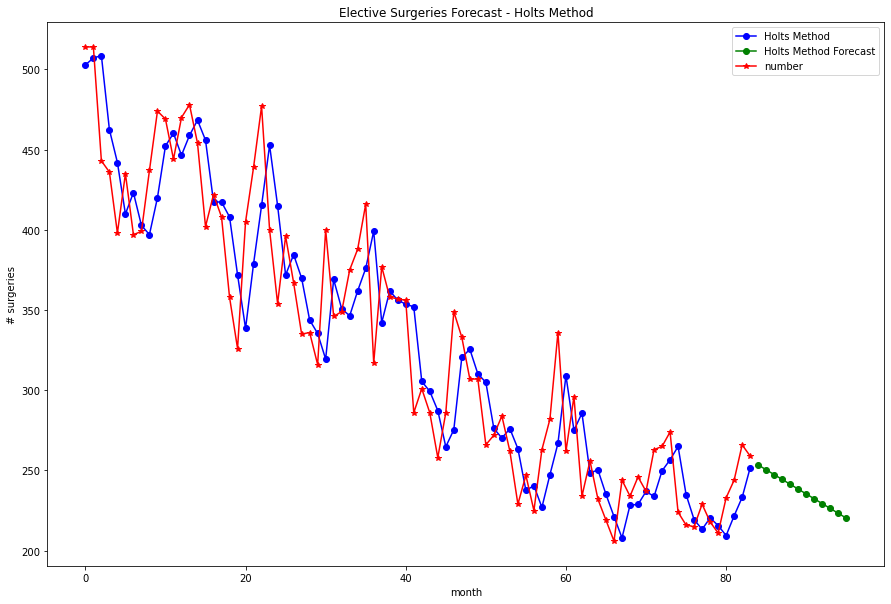

In [32]:
# Holt's Method - algorithm to auto-select smoothing_level + smoothing_trend parameter values
fit1_holt = Holt(surgery['number']).fit()
fit1_holt.fittedvalues = fit1_holt.fittedvalues.rename('Holt''s Method')
fcast1_holt = fit1_holt.forecast(12).rename('Holt''s Method Forecast')
fit1_holt.fittedvalues.plot(marker='o', color='blue')
fcast1_holt.plot(marker='o', color='green', figsize=(15,10))
surgery['number'].plot(marker='*', color='red')
plt.xlabel('month')
plt.ylabel('# surgeries')
plt.title('Elective Surgeries Forecast - Holt''s Method')
plt.legend(loc='best')
plt.show()

In [33]:
print('Smoothing Level Holt ', fit1_holt.params['smoothing_level'])
print('Smoothing Trend Holt ', fit1_holt.params['smoothing_trend'])

rmse_holt = np.sqrt(mean_squared_error(fit1_holt.fittedvalues, surgery['number']))
mae_holt = mean_absolute_error(fit1_holt.fittedvalues, surgery['number'])
print('RMSE Holt Model: ', rmse_holt)
print('MAE Holt Model: ', mae_holt)

Smoothing Level Holt  0.6552472614884186
Smoothing Trend Holt  0.002588408496577506
RMSE Holt Model:  34.06889698577549
MAE Holt Model:  27.019463872982058


c:\users\justin scott\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


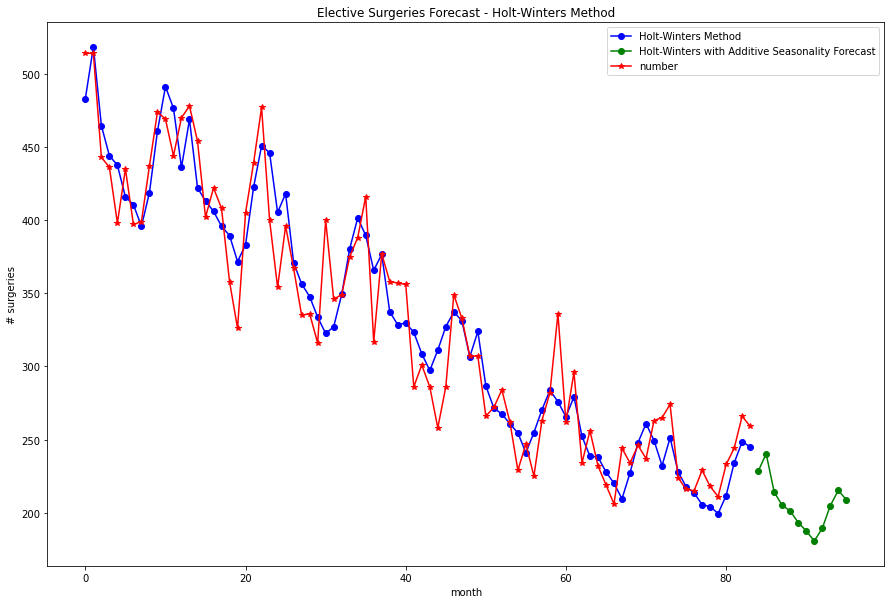

In [34]:
# Holt-Winters' Method - algorithm to auto-select smoothing_level + smoothing_trend + smoothing_seasonal parameter values
fit1_winters = ExponentialSmoothing(surgery['number'], seasonal_periods=12, trend='add', seasonal='mul').fit()
fit1_winters.fittedvalues = fit1_winters.fittedvalues.rename('Holt-Winters'' Method')
fcast1_winters = fit1_winters.forecast(12).rename('Holt-Winters'' with Additive Seasonality Forecast')
fit1_winters.fittedvalues.plot(marker='o', color='blue')
fcast1_winters.plot(marker='o', color='green', figsize=(15,10))
surgery['number'].plot(marker='*', color='red')
plt.xlabel('month')
plt.ylabel('# surgeries')
plt.title('Elective Surgeries Forecast - Holt-Winters'' Method')
plt.legend(loc='best')
plt.show()

In [35]:
print('Smoothing Level Holt-Winters ', fit1_winters.params['smoothing_level'])
print('Smoothing Trend Holt-Winters ', fit1_winters.params['smoothing_trend'])
print('Smoothing Seasonal Holt-Winters ', fit1_winters.params['smoothing_seasonal'])

rmse_winters = np.sqrt(mean_squared_error(fit1_winters.fittedvalues, surgery['number']))
mae_winters = mean_absolute_error(fit1_winters.fittedvalues, surgery['number'])
print('RMSE Holt-Winters Model: ', rmse_winters)
print('MAE Holt-Winters Model: ', mae_winters)

Smoothing Level Holt-Winters  0.19530489082194516
Smoothing Trend Holt-Winters  0.00027951535149343834
Smoothing Seasonal Holt-Winters  0.001591901570909462
RMSE Holt-Winters Model:  24.391326243089757
MAE Holt-Winters Model:  19.21432101173726


In [36]:
for i in range(12):
    print('month #', i + 85, ' forecast sales: ', fcast1_winters[i+len(surgery)])

month # 85  forecast sales:  228.32511772847118
month # 86  forecast sales:  240.28052029236923
month # 87  forecast sales:  214.07683270212084
month # 88  forecast sales:  205.02159655475222
month # 89  forecast sales:  201.23671075150025
month # 90  forecast sales:  193.194483657181
month # 91  forecast sales:  187.61528967204353
month # 92  forecast sales:  180.60594067901835
month # 93  forecast sales:  189.26359240900618
month # 94  forecast sales:  204.7772300179106
month # 95  forecast sales:  215.25833264335876
month # 96  forecast sales:  208.93142139738342
